In [50]:
# !pip install keras
# !nvidia-smi

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import sys
sys.path.append("../") 

In [53]:
import os
os.environ['NVIDIA_VISIBLE_DEVICES'] = "1"
os.environ['CUDA_VISIBLE_DEVICES'] = "1"
os.environ

environ{'PATH': '/opt/conda/bin:/opt/conda/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin',
        'HOSTNAME': '78353253e378',
        'TERM': 'xterm-color',
        'NVIDIA_VISIBLE_DEVICES': '1',
        'CUDA_VERSION': '9.0.176',
        'CUDA_PKG_VERSION': '9-0=9.0.176-1',
        'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64',
        'NVIDIA_DRIVER_CAPABILITIES': 'compute,utility',
        'NVIDIA_REQUIRE_CUDA': 'cuda>=9.0',
        'NCCL_VERSION': '2.4.2',
        'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs',
        'CUDNN_VERSION': '7.4.2.24',
        'LANG': 'C.UTF-8',
        'HOME': '/root',
        'JPY_PARENT_PID': '6',
        'CLICOLOR': '1',
        'PAGER': 'cat',
        'GIT_PAGER': 'cat',
        'MPLBACKEND': 'module://ipykernel.pylab.backend_inline',
        'CUDA_VISIBLE_DEVICES': '1'}

In [54]:
# !python download_cvpr2016_cub.py

In [6]:
from download_cvpr2016_cub import DEFAULT_DIR, download_and_uncompress_dataset
from download_cvpr2016_flowers import DEFAULT_DIR as FLOWERS_DATA_DIR
from download_cvpr2016_flowers import DEFAULT_FLOWERS_DIR
from download_cvpr2016_cub import DEFAULT_CUB_DIR
from torch.utils.serialization import load_lua
import os
import numpy as np
from xian2017_cub_loader import Xian2017CubLoader
from xian2018_flowers_loader import Xian2018FlowersLoader
import matplotlib.pyplot as plt
import logging 
import importlib 
import scipy
importlib.reload(logging) 
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S') 
logging.info("starting...")


Using TensorFlow backend.
11:36:54 INFO:starting...


In [7]:
loader_trainval = Xian2017CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='trainval')
loader_trainval.load_cached()

# loader_trainval.image_classes

11:36:54 INFO:Loading split trainval
11:36:54 INFO:Loading cached file /mnt/datasets/public/research/cvpr2016_cub/split_trainval_xian2017.pkl
11:37:00 INFO:Loaded cache in 5.939242 sec


In [8]:
output = loader_trainval.next_batch_fewshot(batch_size=32, num_images=2, num_texts=15)

# output = loader_trainval.next_batch_features(batch_size=32, num_images=2, num_texts=15)

In [307]:
# loader_test_seen = Xian2017CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='test_seen')
# loader_test_seen.load()
# !mv /mnt/datasets/public/research/cvpr2016_cub/split_val_unseen_xian2017.pkl /mnt/datasets/public/research/cvpr2016_cub/split_val_unseen_xian2017_50classes.pkl

In [312]:
!ls /mnt/datasets/public/research/cvpr2016_cub/
!rm split_val_unseen_xian2017.pkl

CUB_200_2011			split_trainval_xian2017.pkl
CUB_200_2011.tgz		split_val_seen_xian2017.pkl
allclasses.txt			split_val_unseen_xian2017.pkl
attributes.txt			split_val_unseen_xian2017_50classes.pkl
bow_c10				testclasses.txt
cvpr2016_cub.tar.gz		text_c10
datasets			trainclasses.txt
images				trainids.txt
inception_v2.ckpt		trainvalclasses.txt
inception_v2.ckpt.tar.gz	trainvalids.txt
inception_v3.ckpt		valclasses.txt
inception_v3.ckpt-old		valids.txt
inception_v3.ckpt.tar.gz	vocab_c10.t7
inception_v3.ckpt.tar.gz-old	w2v_c10
manifest.txt			word_c10
split_test_seen_xian2017.pkl	xlsa17
split_test_unseen_xian2017.pkl	xlsa17.zip.tgz
split_train_xian2017.pkl
rm: cannot remove 'split_val_unseen_xian2017.pkl': No such file or directory


In [311]:
loader_test = Xian2017CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='val_unseen')
loader_test.load_cached()

06:31:56 INFO:Loading split val_unseen
06:31:56 INFO:Loading cached file /mnt/datasets/public/research/cvpr2016_cub/split_val_unseen_xian2017.pkl


EOFError: Ran out of input

In [71]:
len(loader_test.split_class_ids)


loader_test.split_class_ids
100/150 * 50

33.33333333333333

In [264]:
# !rm /mnt/datasets/public/research/cvpr2016_cub/*pkl

In [44]:
len(loader_test.image_file_names)

1175

In [12]:
# !ls /mnt/datasets/public/research/cvpr2016_flowers/cvpr18xian/data/FLO
# !ls /mnt/datasets/public/research/cvpr2016_flowers/

In [13]:
# !rm /mnt/datasets/public/research/cvpr2016_flowers/*pkl

In [38]:
flowers_loader_trainval = Xian2018FlowersLoader(data_dir="/mnt/datasets/public/research/cvpr2016_flowers/", 
                                        flowers_dir=DEFAULT_FLOWERS_DIR, split='val_seen')
flowers_loader_trainval.load()

02:47:17 INFO:Loading split val_seen
100%|██████████| 8189/8189 [00:02<00:00, 2985.64it/s]


In [39]:
flowers_loader_trainval.xlsa_split_image_idxs


array([7734, 4100, 7735, ..., 6135, 4093, 6143], dtype=uint16)

In [37]:
flowers_loader_trainval.xlsa_split_image_idxs


array([7734, 4100, 7735, ..., 6135, 4093, 6143], dtype=uint16)

In [62]:
len(flowers_loader_trainval.att_splits_matfile['train_loc'])

5878

In [43]:
a = flowers_loader_trainval.next_batch_features()

In [55]:
text = a[1]
text_len = a[2]

In [56]:
text[0]

array([[  4,   1,   5,   2,  10,   6,  11, 905,  11,  19,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  4,   1,  15,  11,  13,  18,   7,   2,  10,   6,  43,  24,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  8,  11,   1,   7, 394,  26,   2,  85,   8,  21,  30,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  4,   1,   5,  54,  29,  11,   2,   7,  40,  36,   3,  11,  19,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  4,   1,   5,   2,  10,   6,  11,   3,   5,  11,  19,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0]], dtype=int32)

In [57]:
text_len[1]

array([10, 10, 11, 11, 10])

In [12]:
from train import ModelLoader

pretrained_model_dir = '/mnt/home/boris/experiments_zeroshot_pairwise/190327_001724_embedding_size_text_feature_extractor_number_of_steps_repeat_weight_decay_fc_latent_dim_hidden_dim_num_texts_dropout_encoder_decoder_test/embedding_size=512;dropout=0;latent_dim=0;text_feature_extractor=cnn_bi_lstm;number_of_steps=100001;repeat=0;weight_decay_fc=0.0001;hidden_dim=0;num_texts=10'

max_text_len = loader_trainval.max_text_len
model = ModelLoader(model_path=pretrained_model_dir, 
                    batch_size=None, num_images=10, num_texts=10, max_text_len=max_text_len)

07:52:48 INFO:Searching for '/mnt/home/boris/experiments_zeroshot_pairwise/190327_001724_embedding_size_text_feature_extractor_number_of_steps_repeat_weight_decay_fc_latent_dim_hidden_dim_num_texts_dropout_encoder_decoder_test/embedding_size=512;dropout=0;latent_dim=0;text_feature_extractor=cnn_bi_lstm;number_of_steps=100001;repeat=0;weight_decay_fc=0.0001;hidden_dim=0;num_texts=10/params.json'
07:52:48 INFO:Loading existing params.


[None, 1, 30, 300]
Loading model
INFO:tensorflow:Restoring parameters from /mnt/home/boris/experiments_zeroshot_pairwise/190327_001724_embedding_size_text_feature_extractor_number_of_steps_repeat_weight_decay_fc_latent_dim_hidden_dim_num_texts_dropout_encoder_decoder_test/embedding_size=512;dropout=0;latent_dim=0;text_feature_extractor=cnn_bi_lstm;number_of_steps=100001;repeat=0;weight_decay_fc=0.0001;hidden_dim=0;num_texts=10/train/model-100000


In [13]:
metrics, _, _ = model.eval_acc(data_set=loader_test, batch_size=10)
metrics

07:52:53 INFO:Computing embeddings
297it [00:08, 57.18it/s]
07:53:01 INFO:Computing metrics
 32%|███▏      | 963/2967 [00:00<00:00, 9620.63it/s]

Compute KD-tree


100%|██████████| 50/50 [00:00<00:00, 411.19it/s]


{'AP@50/#sentences10': 0.38679999999999992,
 'Top-1 Acc/#sentences10': 0.40815638692281764,
 'AP@50/#sentences50': 0.45280000000000004,
 'Top-1 Acc/#sentences50': 0.5520728008088979,
 'AP@50/#sentences100': 0.46559999999999996,
 'Top-1 Acc/#sentences100': 0.58948432760364,
 'AP@50/#sentences200': 0.48320000000000002,
 'Top-1 Acc/#sentences200': 0.6154364678126053,
 'AP@50/#sentences400': 0.49319999999999992,
 'Top-1 Acc/#sentences400': 0.6228513650151668,
 'AP@50/#sentences1000': 0.48759999999999998,
 'Top-1 Acc/#sentences1000': 0.6285810583080553}

In [67]:
metrics, embeddings = model.eval_acc_gzsh(train_loader=loader_trainval, test_loader=loader_test, batch_size=10)
seen_unseen_text_embeddings, image_embeddings_train, image_embeddings_test = embeddings
metrics

12:18:43 INFO:Computing train embeddings
883it [00:13, 66.64it/s]
12:18:57 INFO:Computing test embeddings
297it [00:04, 66.29it/s]
12:19:01 INFO:Computing generalized zero-shot performance metrics
100%|██████████| 6/6 [00:33<00:00,  5.63s/it]


{'test_U_Top-1 Acc/#sentences10': 0.30712656653764581,
 'test_S_Top-1 Acc/#sentences10': 0.31067775738034781,
 'test_H_Top-1 Acc/#sentences10': 0.30889195568824646,
 'test_U_Top-1 Acc/#sentences50': 0.48554183547816754,
 'test_S_Top-1 Acc/#sentences50': 0.45517378439956541,
 'test_H_Top-1 Acc/#sentences50': 0.46986764133380365,
 'test_U_Top-1 Acc/#sentences100': 0.49311726191132593,
 'test_S_Top-1 Acc/#sentences100': 0.49712601465838624,
 'test_H_Top-1 Acc/#sentences100': 0.49511352406738679,
 'test_U_Top-1 Acc/#sentences200': 0.52296639607465678,
 'test_S_Top-1 Acc/#sentences200': 0.52371227658750186,
 'test_H_Top-1 Acc/#sentences200': 0.5233390705676918,
 'test_U_Top-1 Acc/#sentences400': 0.53337540222533442,
 'test_S_Top-1 Acc/#sentences400': 0.52190299498455428,
 'test_H_Top-1 Acc/#sentences400': 0.52757683774915198,
 'test_U_Top-1 Acc/#sentences1000': 0.54197231207823382,
 'test_S_Top-1 Acc/#sentences1000': 0.5278036438448731,
 'test_H_Top-1 Acc/#sentences1000': 0.5347941493620250

In [29]:

image_id = 4514
print(flowers_loader_trainval.image_file_names[image_id])
flowers_loader_trainval.raw_texts[image_id]

image_04997.jpg


['this flower has myriad small yellow petals that form a spherical bubble around the flower',
 'this flower is yellow in color, with petals that are bunched together closely.',
 'this flower has petals that are yellow and ruffled together',
 'the petals of this flower are orange with a short stigma',
 'this flower has petals that are overlapping and yellow and green pedicel.',
 'this flower has a rounded mound of tiny petals which are orange and ruffled.',
 'the small petals of the flower are semi ruffled, and consist of a vibrant yellow color.',
 'a large golden flower with green leaves attached to it.',
 'this flower has multiple rows of yellow ribbon like petals that wind tighter closer to the pistil.',
 'this flower has yellow petals as well as a green sepal.']

In [131]:
batch_features, batch_texts, batch_text_lengths, \
    labels_txt2img, class_labels = loader_trainval.next_batch_features()


for batch_features, batch_texts, text_lengths_out in loader_trainval.sequential_evaluation_batches_features():
    
    break
    
batch_features[0]

array([[ 0.17475714,  0.01691125,  0.01377538, ...,  0.60658473,
         0.        ,  0.        ],
       [ 0.17475714,  0.01691125,  0.01377538, ...,  0.60658473,
         0.        ,  0.        ],
       [ 0.17475714,  0.01691125,  0.01377538, ...,  0.60658473,
         0.        ,  0.        ],
       ..., 
       [ 0.17475714,  0.01691125,  0.01377538, ...,  0.60658473,
         0.        ,  0.        ],
       [ 0.17475714,  0.01691125,  0.01377538, ...,  0.60658473,
         0.        ,  0.        ],
       [ 0.17475714,  0.01691125,  0.01377538, ...,  0.60658473,
         0.        ,  0.        ]])

In [69]:
import scipy

image_features_path = os.path.join(loader_trainval.xlsa17_dir, "res101.mat")
image_features = scipy.io.loadmat(image_features_path)
image_file_names = {n[0].split("/")[-1]: f for n,f in zip(image_features['image_files'].ravel(), image_features['features'].transpose())}

In [101]:
image_features['image_files']
print(image_features.keys())

zip(image_features['image_files'].ravel(), image_features['features'].transpose())
image_file_names['Black_Footed_Albatross_0001_796111.jpg'].shape

dict_keys(['__header__', '__version__', '__globals__', 'image_files', 'features', 'labels'])


(2048,)

In [210]:
att_splits = scipy.io.loadmat(os.path.join(loader_trainval.xlsa17_dir, "att_splits.mat"))
res101 = scipy.io.loadmat(os.path.join(loader_trainval.xlsa17_dir, "res101.mat"))

In [207]:
att_splits.keys()

dict_keys(['__header__', '__version__', '__globals__', 'allclasses_names', 'att', 'original_att', 'test_seen_loc', 'test_unseen_loc', 'train_loc', 'trainval_loc', 'val_loc'])

In [79]:
len(att_splits['test_seen_loc'])

1764

In [211]:
res101['image_files'][att_splits['trainval_loc']]

array([[[ array([ '/BS/Deep_Fragments/work/MSc/CUB_200_2011/CUB_200_2011/images/185.Bohemian_Waxwing/Bohemian_Waxwing_0078_796649.jpg'],
      dtype='<U114')]],

       [[ array([ '/BS/Deep_Fragments/work/MSc/CUB_200_2011/CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0037_179710.jpg'],
      dtype='<U108')]],

       [[ array([ '/BS/Deep_Fragments/work/MSc/CUB_200_2011/CUB_200_2011/images/047.American_Goldfinch/American_Goldfinch_0014_32154.jpg'],
      dtype='<U117')]],

       ..., 
       [[ array([ '/BS/Deep_Fragments/work/MSc/CUB_200_2011/CUB_200_2011/images/090.Red_breasted_Merganser/Red_Breasted_Merganser_0034_79292.jpg'],
      dtype='<U125')]],

       [[ array([ '/BS/Deep_Fragments/work/MSc/CUB_200_2011/CUB_200_2011/images/196.House_Wren/House_Wren_0061_187911.jpg'],
      dtype='<U102')]],

       [[ array([ '/BS/Deep_Fragments/work/MSc/CUB_200_2011/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0003_25970.jpg'],
      dtype='<U99')]]], dtype=object)

In [87]:
image_features

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Apr 25 16:59:11 2017',
 '__version__': '1.0',
 '__globals__': [],
 'image_files': array([[ array([ '/BS/Deep_Fragments/work/MSc/CUB_200_2011/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg'],
       dtype='<U126')],
        [ array([ '/BS/Deep_Fragments/work/MSc/CUB_200_2011/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg'],
       dtype='<U122')],
        [ array([ '/BS/Deep_Fragments/work/MSc/CUB_200_2011/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0003_796136.jpg'],
       dtype='<U126')],
        ..., 
        [ array([ '/BS/Deep_Fragments/work/MSc/CUB_200_2011/CUB_200_2011/images/200.Common_Yellowthroat/Common_Yellowthroat_0122_190570.jpg'],
       dtype='<U120')],
        [ array([ '/BS/Deep_Fragments/work/MSc/CUB_200_2011/CUB_200_2011/images/200.Common_Yellowthroat/Common_Yellowthroat_0125_190902.jpg'],
       

In [23]:
# loader_train = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='train')
# loader_test = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='test')
# loader_val = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='val')
# loader_all = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='all')
loader_trainval = Xian2017CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='trainval')

In [24]:
# loader_train = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='train')
# loader_test = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='test')
# loader_val = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='val')
# loader_all = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='all')
# loader_trainval = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='trainval')

In [28]:
# loader_train.load()
loader_trainval.load()
# loader_test.load()
# loader_val.load()
# loader_all.load()

loader_trainval.data_dir

08:52:03 INFO:Loading split trainval


AttributeError: 'Xian2017CubLoader' object has no attribute 'xlsa17_dir'

['the large bird in the water has red eyes, a long white neck, and a gray and white back.',
 'waterfowl with triangular beak of medium length, white cheeks, black long neck with white front, and gray back.',
 'this bird has a red eyering, dark brown and black head, throat, and grey and white covering the rest of its body.',
 'large bird with a long brown & white neck- has red eyes and a long beak.',
 'this long necked bird has a brown neck, white cheek patches, and a distinctive red eye.',
 'this particular bird has a gray beak and red eyes',
 'this bird is white and brown in color, with alight colored beak.',
 'a large black and white bird with a long skinny neck, a red eye, and a short pointy beak.',
 'this bird has wings that are grey and has a long neck and red eyes',
 'this bird has wings that are brown and has red eyes']

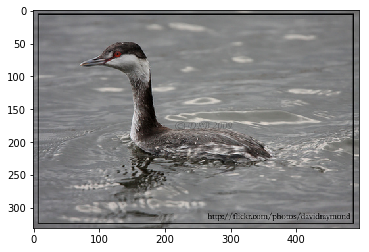

In [44]:
image_id = 1000
plt.imshow(loader_test.raw_images[image_id])
loader_test.raw_texts[image_id]

In [73]:
images, texts, text_lengths = loader_train.next_batch(batch_size=64, num_images=2, num_texts=5)

In [313]:
print(text_lengths[0])
print(texts[0])

print(" ".join([loader_train.tokenizer.index_word[i] for i in texts[0][1] if i > 0]))

plt.imshow(images[0][0])
plt.show()
plt.imshow(images[0][1])

NameError: name 'text_lengths' is not defined

In [5]:
loader_trainval = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='trainval')
loader_trainval.load_cached()


Loading split trainval
Loading cached file /mnt/datasets/public/research/cvpr2016_cub/split_trainval.pkl
Loaded cache in 59.26743674278259 sec


In [7]:
a = loader_trainval.next_batch_features()
a[-1].dtype

dtype('int64')

In [12]:
set(loader_trainval.image_classes)

{'002',
 '003',
 '005',
 '007',
 '010',
 '011',
 '012',
 '013',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '024',
 '025',
 '026',
 '027',
 '028',
 '030',
 '032',
 '039',
 '040',
 '041',
 '042',
 '044',
 '045',
 '046',
 '047',
 '048',
 '050',
 '052',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '067',
 '068',
 '069',
 '070',
 '071',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '080',
 '081',
 '082',
 '085',
 '087',
 '088',
 '089',
 '090',
 '092',
 '093',
 '094',
 '097',
 '099',
 '100',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '113',
 '115',
 '116',
 '117',
 '118',
 '120',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '131',
 '132',
 '133',
 '134',
 '136',
 '137',
 '139',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '148',
 '149',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '157',
 '158',
 '159',
 '160',
 '161',
 '162',
 '164',
 '167',
 '168',
 '169',


In [314]:
1

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
[autoreload of matplotlib.colors failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>",

1